In [38]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


def load_results(file_path):
    """
    Load results from a pickle file.

    Args:
        file_path (str): Path to the pickle file.

    Returns:
        dict: Dictionary containing the loaded results.
    """
    try:
        with open(file_path, 'rb') as f:
            results = pickle.load(f)
        return results
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        return None 

In [39]:
method = "DC3"
prob_type = "convex"
prob_name = "qp"
seed = 2025
fname = "Problem-100-50-50-10000"
fname = "Problem-192-238-120-1000"
#dir_path = f"{prob_type}/{prob_name}/{prob_name.upper()}Problem-100-50-50-10000/MLP_{method}/results_seed{seed}.pkl"
#dir_path = f"{prob_type}/{prob_name}/{prob_name.upper()}Problem-192-238-120-1000/MLP_{method}/results_seed{seed}.pkl"
dir_path = f"{prob_type}/{prob_name}/{prob_name.upper()}{fname}/MLP_{method}/results_seed{seed}.pkl"

results = load_results(dir_path)

In [40]:
print(results.keys())
print(results['training_time_seconds'])
results['test_results']['batch_size_comparison']

dict_keys(['seed', 'method', 'config', 'timestamp', 'training_time_seconds', 'train_history', 'val_history', 'test_results', 'pytorch_version', 'device_used'])
365.0215947628021


{256: {'metrics': {'ineq_violation_l1_mean': 7.579644772244737,
   'eq_violation_l1_max': 7.6996463896565e-13,
   'opt_gap_mean': 0.003252167389391278,
   'opt_gap_std': 0.0,
   'eq_violation_l2_max': 2.2994219401745706e-26,
   'ineq_violation_l1_max': 11.553908975497043,
   'solution_distance_max': 1249.8390866023585,
   'eq_violation_l1_mean': 5.506841251732192e-13,
   'opt_gap_min': 0.0010788242820738859,
   'ineq_violation_l2_max': 15.61398690267724,
   'ineq_violation_max_max': 3.07336031011288,
   'solution_distance_mean': 572.142935063266,
   'objective': 6587.043134130591,
   'opt_gap_max': 0.005391351267692645,
   'eq_violation_l2_mean': 7.480583341440109e-27,
   'solution_distance_std': 0.0,
   'ineq_violation_max_mean': 1.5459588320440505,
   'eq_violation_max_mean': 3.432809592140984e-14,
   'eq_violation_max_max': 8.881784197001252e-14,
   'true_objective': 6565.725084424895,
   'ineq_violation_l2_mean': 7.4865112796324915,
   'total_time': 0.24605822563171387,
   'avg_inf

training convergence
------------

<Axes: >

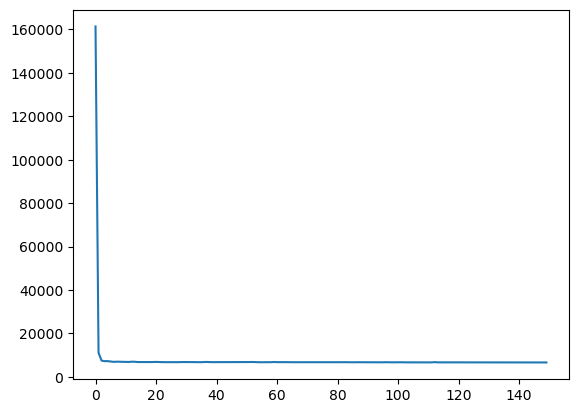

In [41]:
#results['train_history']
df = pd.DataFrame(results['train_history'])
df
df.loss.plot()

training time
-------------

In [42]:
# can be misleading, if nb epoch not adapted 
print(results.keys())
print(results['training_time_seconds'])
print(results['timestamp'])

dict_keys(['seed', 'method', 'config', 'timestamp', 'training_time_seconds', 'train_history', 'val_history', 'test_results', 'pytorch_version', 'device_used'])
365.0215947628021
2025-09-11 15:03:07


In [43]:
# just added 'epoch_time' field
# NB: this is training time, different from inference time below
df = pd.DataFrame(results['train_history'])
try:
   print('training epoch_time.mean=', df.epoch_time.mean() )
except:
   print("df.epoch_time NOT AVAILABLE !!!!!")

df.epoch_time NOT AVAILABLE !!!!!


test-time metrics: 1 algo
---------

In [55]:
def results_to_readable(results):
    # Get batch comparison data from the loaded results
    batch_comparison = results['test_results']['batch_size_comparison']

    # Create a more readable DataFrame by expanding the metrics
    readable_data = []
    for batch_size, data in batch_comparison.items():
        metrics = data['metrics']
        row = {'Method': method,
            'Batch Size': batch_size,
            'Opt Gap Mean (\%)': f"{metrics['opt_gap_mean']*100:.4f}",
            #'Opt Gap Std (\%)': f"{metrics['opt_gap_std']*100:.4f}",
            'Opt Gap Std (\%)': f"{metrics['opt_gap_std']*100:.2e}",
            'Opt Gap Max (\%)': f"{metrics['opt_gap_max']*100:.4f}",
            'Eq Violation Mean': f"{metrics['eq_violation_l1_mean']:.2e}",
            'Eq Violation Max': f"{metrics['eq_violation_l1_max']:.2e}",
            'Ineq Violation Mean': f"{metrics['ineq_violation_l1_mean']:.2e}",
            'Ineq Violation Max': f"{metrics['ineq_violation_l1_max']:.2e}",
            'Average Batch inference Time (s)': f"{metrics['avg_inference_time']:.4f}",
        }
        readable_data.append(row)

    df_readable = pd.DataFrame(readable_data)
    return df_readable
df_readable = results_to_readable(results)
df_readable_styled = df_readable.style.set_properties(**{'text-align': 'center'})
display(df_readable_styled)
print(df_readable.T.to_latex())

<>:11: SyntaxWarning: invalid escape sequence '\%'
<>:13: SyntaxWarning: invalid escape sequence '\%'
<>:14: SyntaxWarning: invalid escape sequence '\%'
<>:11: SyntaxWarning: invalid escape sequence '\%'
<>:13: SyntaxWarning: invalid escape sequence '\%'
<>:14: SyntaxWarning: invalid escape sequence '\%'
/tmp/ipykernel_8240/2982497909.py:11: SyntaxWarning: invalid escape sequence '\%'
  'Opt Gap Mean (\%)': f"{metrics['opt_gap_mean']*100:.4f}",
/tmp/ipykernel_8240/2982497909.py:13: SyntaxWarning: invalid escape sequence '\%'
  'Opt Gap Std (\%)': f"{metrics['opt_gap_std']*100:.2e}",
/tmp/ipykernel_8240/2982497909.py:14: SyntaxWarning: invalid escape sequence '\%'
  'Opt Gap Max (\%)': f"{metrics['opt_gap_max']*100:.4f}",


,Method,Batch Size,Opt Gap Mean (\%),Opt Gap Std (\%),Opt Gap Max (\%),Eq Violation Mean,Eq Violation Max,Ineq Violation Mean,Ineq Violation Max,Average Batch inference Time (s)
0,DC3,512,0.3252,0.00e+00,0.5391,5.51e-13,7.70e-13,7.58e+00,1.16e+01,0.2348


\begin{tabular}{ll}
\toprule
 & 0 \\
\midrule
Method & DC3 \\
Batch Size & 512 \\
Opt Gap Mean (\%) & 0.3252 \\
Opt Gap Std (\%) & 0.00e+00 \\
Opt Gap Max (\%) & 0.5391 \\
Eq Violation Mean & 5.51e-13 \\
Eq Violation Max & 7.70e-13 \\
Ineq Violation Mean & 7.58e+00 \\
Ineq Violation Max & 1.16e+01 \\
Average Batch inference Time (s) & 0.2348 \\
\bottomrule
\end{tabular}



test-time metrics: all algo
---------

In [64]:
row_l = []
seed = 2025
for method in ['DC3','FSNet','skm']:
    #dir_path = f"{prob_type}/{prob_name}/{prob_name.upper()}Problem-100-50-50-10000/MLP_{method}/results_seed{seed}.pkl"
    #dir_path = f"{prob_type}/{prob_name}/{prob_name.upper()}Problem-192-238-120-1000/MLP_{method}/results_seed{seed}.pkl"
    dir_path = f"{prob_type}/{prob_name}/{prob_name.upper()}{fname}/MLP_{method}/results_seed{seed}.pkl"
    results = load_results(dir_path)
    # Get batch comparison data from the loaded results
    batch_comparison = results['test_results']['batch_size_comparison']
    # get only batchsize 256
    metrics = (results['test_results']['batch_size_comparison'].pop(256))['metrics']
    # 
    row = {
        'Algorithm': method,
            'Opt Gap Mean (\%)': f"{metrics['opt_gap_mean']*100:.4f}",
            #'Opt Gap Std (\%)': f"{metrics['opt_gap_std']*100:.4f}",
            'Opt Gap Std (\%)': f"{metrics['opt_gap_std']*100:.2e}",
            'Opt Gap Max (\%)': f"{metrics['opt_gap_max']*100:.4f}",
            'Eq Viol Mean': f"{metrics['eq_violation_l1_mean']:.2e}",
            'Eq Viol Max': f"{metrics['eq_violation_l1_max']:.2e}",
            'Ineq Viol Mean': f"{metrics['ineq_violation_l1_mean']:.2e}",
            'Ineq Viol Max': f"{metrics['ineq_violation_l1_max']:.2e}",
            'Avg Batch inference Time (s)': f"{metrics['avg_inference_time']:.4f}",
        
    }
    row_l.append(row)

df = pd.DataFrame(row_l)
print(df)
print(df.T.to_latex())

  Algorithm Opt Gap Mean (\%) Opt Gap Std (\%) Opt Gap Max (\%) Eq Viol Mean  \
0       DC3            0.3252         0.00e+00           0.5391     5.51e-13   
1     FSNet            4.9772         0.00e+00           6.0583     1.42e+01   
2       skm            0.8263         0.00e+00           1.1729     8.99e-13   

  Eq Viol Max Ineq Viol Mean Ineq Viol Max Avg Batch inference Time (s)  
0    7.70e-13       7.58e+00      1.16e+01                       0.2461  
1    3.41e+01       8.41e+00      1.24e+01                       0.9240  
2    1.08e-12       8.03e-16      2.05e-15                       1.1060  
\begin{tabular}{llll}
\toprule
 & 0 & 1 & 2 \\
\midrule
Algorithm & DC3 & FSNet & skm \\
Opt Gap Mean (\%) & 0.3252 & 4.9772 & 0.8263 \\
Opt Gap Std (\%) & 0.00e+00 & 0.00e+00 & 0.00e+00 \\
Opt Gap Max (\%) & 0.5391 & 6.0583 & 1.1729 \\
Eq Viol Mean & 5.51e-13 & 1.42e+01 & 8.99e-13 \\
Eq Viol Max & 7.70e-13 & 3.41e+01 & 1.08e-12 \\
Ineq Viol Mean & 7.58e+00 & 8.41e+00 & 8.03e-16 \

<>:15: SyntaxWarning: invalid escape sequence '\%'
<>:17: SyntaxWarning: invalid escape sequence '\%'
<>:18: SyntaxWarning: invalid escape sequence '\%'
<>:15: SyntaxWarning: invalid escape sequence '\%'
<>:17: SyntaxWarning: invalid escape sequence '\%'
<>:18: SyntaxWarning: invalid escape sequence '\%'
/tmp/ipykernel_8240/20353959.py:15: SyntaxWarning: invalid escape sequence '\%'
  'Opt Gap Mean (\%)': f"{metrics['opt_gap_mean']*100:.4f}",
/tmp/ipykernel_8240/20353959.py:17: SyntaxWarning: invalid escape sequence '\%'
  'Opt Gap Std (\%)': f"{metrics['opt_gap_std']*100:.2e}",
/tmp/ipykernel_8240/20353959.py:18: SyntaxWarning: invalid escape sequence '\%'
  'Opt Gap Max (\%)': f"{metrics['opt_gap_max']*100:.4f}",


seed variability
------------------

In [ ]:

seed_l = [2025,2025]
row_l = []
for seed in seed_l:
    #dir_path = f"{prob_type}/{prob_name}/{prob_name.upper()}Problem-100-50-50-10000/MLP_{method}/results_seed{seed}.pkl"
    #dir_path = f"{prob_type}/{prob_name}/{prob_name.upper()}Problem-192-238-120-1000/MLP_{method}/results_seed{seed}.pkl"
    dir_path = f"{prob_type}/{prob_name}/{prob_name.upper()}{fname}/MLP_{method}/results_seed{seed}.pkl"
    results = load_results(dir_path)
    # Get batch comparison data from the loaded results
    batch_comparison = results['test_results']['batch_size_comparison']
    # get only batchsize 256
    metrics = (results['test_results']['batch_size_comparison'].pop(256))['metrics']
    # 
    row = {
        'Opt Gap Mean (%)': metrics['opt_gap_mean']*100,
        'Opt Gap Std (%)': metrics['opt_gap_std']*100,
        'Opt Gap Max (%)': metrics['opt_gap_max']*100,
        'Eq Violation Mean': metrics['eq_violation_l1_mean'],
        'Eq Violation Max': metrics['eq_violation_l1_max'],
        'Ineq Violation Mean': metrics['ineq_violation_l1_mean'],
        'Ineq Violation Max': metrics['ineq_violation_l1_max'],
        'Average Batch inference Time (s)': metrics['avg_inference_time'],
    }
    row_l.append(row)

df = pd.DataFrame(row_l)
#print(df)
print('STD over realizations:\n')
print(df.std(axis=0).T)

STD over realizations:

Opt Gap Mean (%)                    0.0
Opt Gap Std (%)                     0.0
Opt Gap Max (%)                     0.0
Eq Violation Mean                   0.0
Eq Violation Max                    0.0
Ineq Violation Mean                 0.0
Ineq Violation Max                  0.0
Average Batch inference Time (s)    0.0
dtype: float64


In [46]:
metrics

{'ineq_violation_l1_mean': 7.579644772244737,
 'eq_violation_l1_max': 7.6996463896565e-13,
 'opt_gap_mean': 0.003252167389391278,
 'opt_gap_std': 0.0,
 'eq_violation_l2_max': 2.2994219401745706e-26,
 'ineq_violation_l1_max': 11.553908975497043,
 'solution_distance_max': 1249.8390866023585,
 'eq_violation_l1_mean': 5.506841251732192e-13,
 'opt_gap_min': 0.0010788242820738859,
 'ineq_violation_l2_max': 15.61398690267724,
 'ineq_violation_max_max': 3.07336031011288,
 'solution_distance_mean': 572.142935063266,
 'objective': 6587.043134130591,
 'opt_gap_max': 0.005391351267692645,
 'eq_violation_l2_mean': 7.480583341440109e-27,
 'solution_distance_std': 0.0,
 'ineq_violation_max_mean': 1.5459588320440505,
 'eq_violation_max_mean': 3.432809592140984e-14,
 'eq_violation_max_max': 8.881784197001252e-14,
 'true_objective': 6565.725084424895,
 'ineq_violation_l2_mean': 7.4865112796324915,
 'total_time': 0.24605822563171387,
 'avg_inference_time': 0.24605822563171387}